## Import Library yang dibutuhkan

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

## Membaca Data CSV

In [2]:
df = pd.read_csv("Loan_Data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Melihat informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Data terdiri sebanyak 614 dan memiliki missing values

## Exploratory Data Analysis (EDA)

Pada tahap ini, akan dilakukan eksplorasi data untuk memahami struktur, distribusi, serta pola pada dataset.

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64


<Axes: xlabel='Gender'>

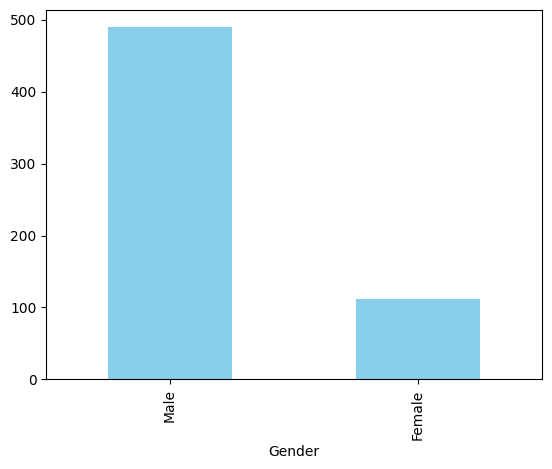

In [5]:
# Melakukan visualisasi pada data Gender dengan menggunakan bar chart
EDA_Gender = df.Gender.value_counts(dropna=False)
print(EDA_Gender)

df['Gender'].value_counts().plot.bar(color='skyblue')

Dari visualisasi di atas, dapat dilihat bahwa jenis kelamin laki-laki lebih banyak yang melakukan pinjaman dibandingkan dengan perempuan. Pada data gender ini juga memiliki nilai missing values sebanyak 13 NaN.

Married    398
Single     213
NaN          3
Name: count, dtype: int64


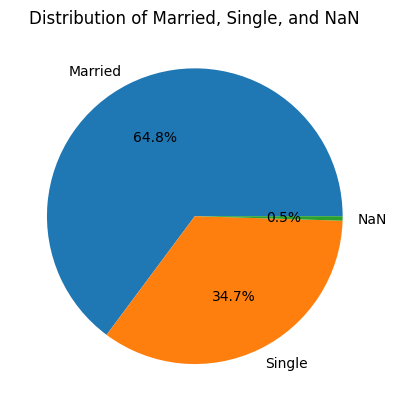

In [6]:
# Melakukan visualisasi pada data status Married dengan menggunakan pie chart
Married_counts = df.Married.value_counts(dropna=False)
Married_counts.index = ['Married', 'Single', 'NaN']
print(Married_counts)

Married_counts.plot.pie(autopct='%1.1f%%')

plt.title('Distribution of Married, Single, and NaN')
plt.ylabel('')

plt.show()

Dari visualisasi di atas dapat dilihat bahwa persebaran data untuk yang sudah menikah sebanyak 64.8% dan yang belum sebanyak 34.7%. Serta pada data ini memiliki missing values sebanyak 3 data yang tidak diketahui status pernikahannya.

Dependents Info:
0      345
1      102
2      101
3+      51
NaN     15
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Dependents')

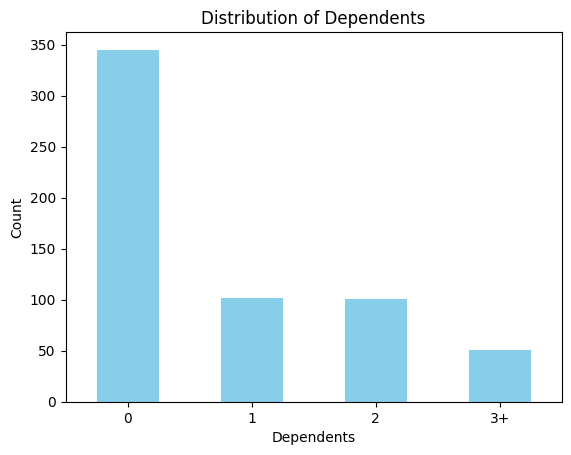

In [7]:
# Melakukan visualisasi persebaran tanggungan pada data dengan menggunakan bar chart
Dependents_counts = df.Dependents.value_counts(dropna=False)
print('Dependents Info:')
Dependents_counts.index = ['0', '1', '2', '3+', 'NaN']
print(Dependents_counts)

ax = df['Dependents'].value_counts().plot.bar(color='skyblue')

plt.xticks(rotation=0)
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('Distribution of Dependents')

Dapat dilihat dari data yang mengajukan peminjaman lebih banyak yang tidak memiliki tanggungan. Sementara untuk yang memiliki tanggungan sebanyak 1 dan 2 orang hampir sama jumlahnya, dan yang lebih dari 3 hanya sebanyak 51 orang.

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


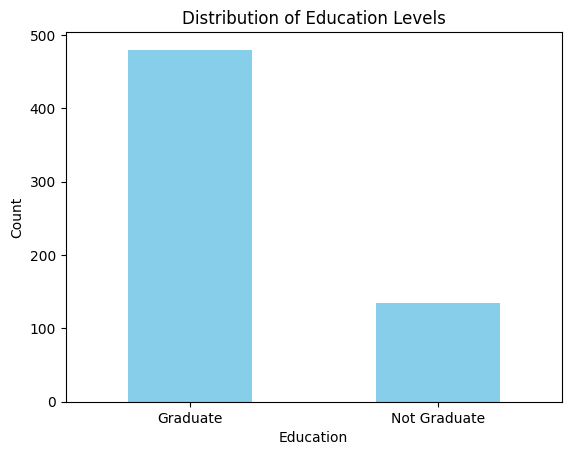

In [8]:
# Melakukan visuaslisasi data untuk melihat tingkat pendidikan menggunakan bar chart
Education_counts = df.Education.value_counts(dropna=False)
print(Education_counts)

ax = df['Education'].value_counts().plot.bar(color='skyblue')

plt.xticks(rotation=0)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Education Levels')

# Menampilkan plot
plt.show()

Dari visualisasi di atas dapat dilihat bahwa lebih banyak yang telah lulus dibandingkan yang belum lulus

Self Employed Info:
Yes    500
No      82
NaN     32
Name: count, dtype: int64


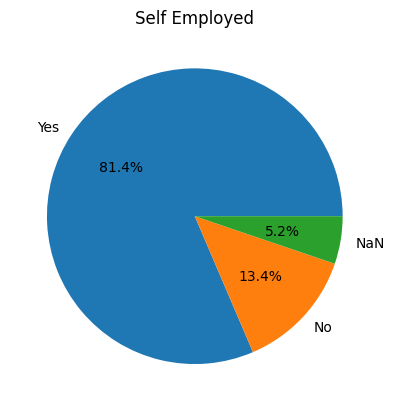

In [9]:
# Melakukan visualisasi status kerja dengan menggunakan pie chart
SE_counts = df.Self_Employed.value_counts(dropna=False)
print('Self Employed Info:')
SE_counts.index = ['Yes', 'No', 'NaN']
print(SE_counts)

SE_counts.plot.pie(autopct='%1.1f%%')

plt.title('Self Employed')
plt.ylabel('')

plt.show()

Dari visualisasi data di atas dapat dilihat bahwa yang mengajukan pinjaman lebih banyak dari para pekerja dibandingkan dengan orang yang tidak bekerja. Pada data ini juga memiliki missing values sebanyak 32 data

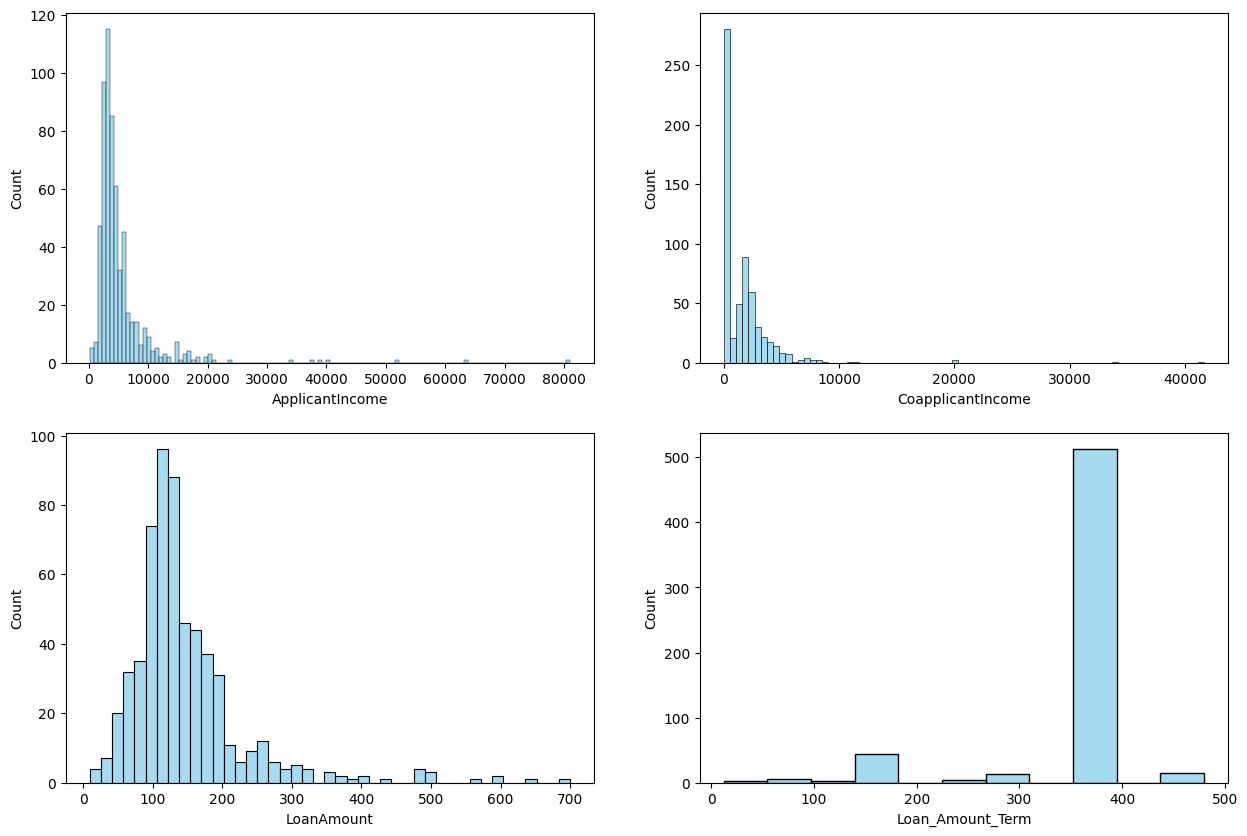

In [10]:
# Melakukan visualisasi data numeric dengan menggunakan histogram
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(data=df, x='ApplicantIncome', ax=axes[0,0], color='skyblue')
sns.histplot(data=df, x='CoapplicantIncome', ax=axes[0,1], color='skyblue')
sns.histplot(data=df, x='LoanAmount', ax=axes[1,0], color='skyblue')
sns.histplot(data=df, x='Loan_Amount_Term', ax=axes[1,1], color='skyblue')

plt.show()

Dari visualisasi di atas, dapat dilakukan analisis di mana untuk data 'ApplicantIncome', 'CoapplicantIncome', dan 'LoanAmount' memiliki kemiringan positif dimana nilai banyak terkumpul pada ekor kiri dan distribusi data memanjang pada ekor kanan. Pada data tersebut juga dapat dilihat memiliki outlier. Sementara untuk data 'Loan_Amount_Term' memiliki kemiringan negatif dan juga terdapat outlier.

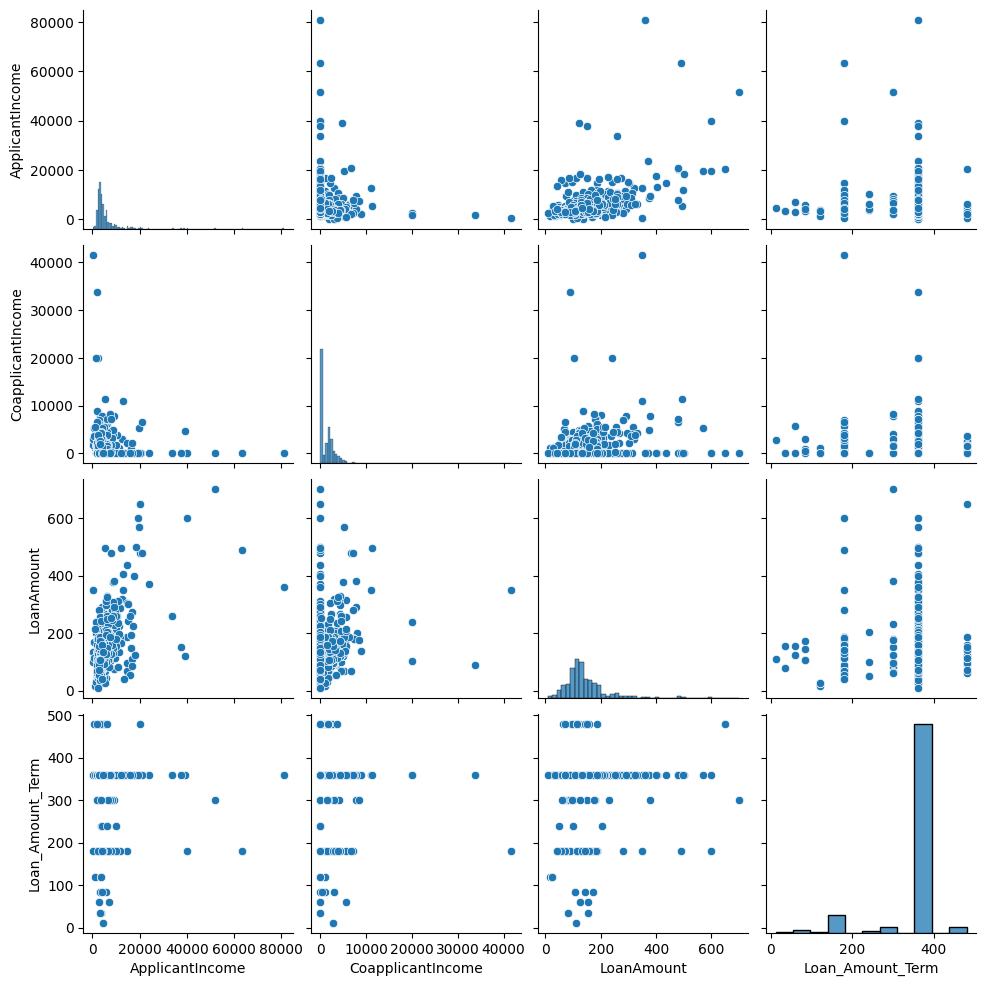

In [12]:
#melihat persebaran data
data = df.get(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"])

data_distribution = pd.DataFrame(data)

# Visualisasi menggunakan pairplot
sns.pairplot(data_distribution)
plt.show()

Loan_Status
Y    422
N    192
Name: count, dtype: int64


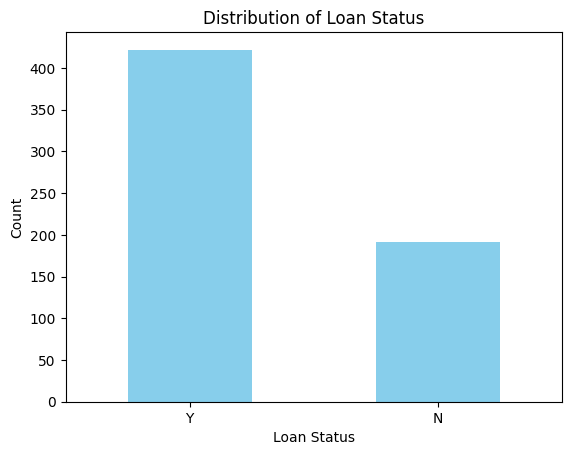

In [13]:
# Melakukan visualisasi pada data loan status dengan menggunakan bar chart
LoanStatus_counts = df.Loan_Status.value_counts(dropna=False)
print(LoanStatus_counts)

ax = df['Loan_Status'].value_counts().plot.bar(color='skyblue')

plt.xticks(rotation=0)
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status')

# Menampilkan plot
plt.show()

Dari visualisasi data di atas dapat dilihat status pinjaman lebih banyak yang disetujui dibandingkan yang ditolak

Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64


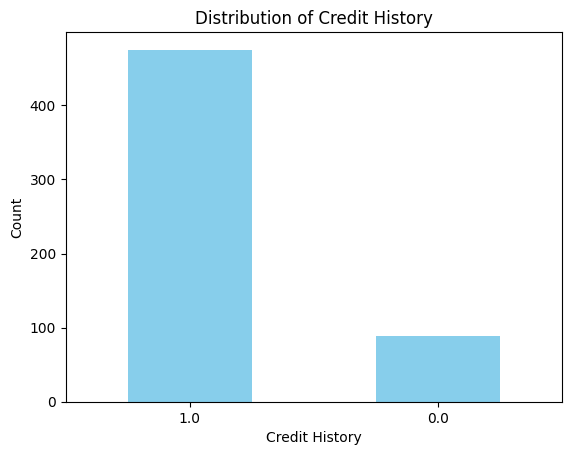

In [14]:
# Melakukan visualisasi untuk data credit history menggunakan bar chart
CH_counts = df.Credit_History.value_counts(dropna=False)
print(CH_counts)

ax = df['Credit_History'].value_counts().plot.bar(color='skyblue')

plt.xticks(rotation=0)
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.title('Distribution of Credit History')

# Menampilkan plot
plt.show()

Dapat dilihat bahwa lebih banyak yang memiliki riwayat kredit sebelumnya dibandingkan yang belum pernah

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


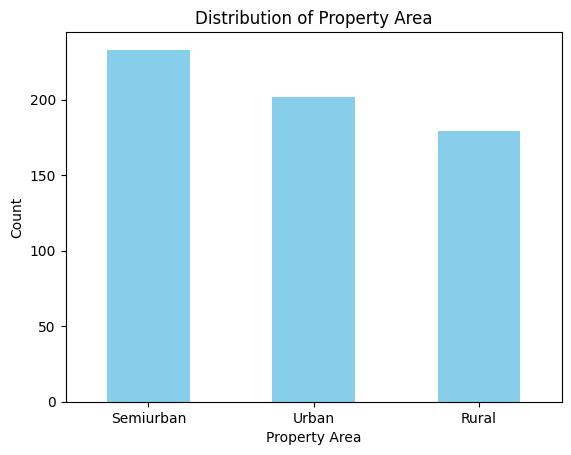

In [15]:
PA_counts = df.Property_Area.value_counts(dropna=False)
print(PA_counts)

df['Property_Area'].value_counts().plot.bar(color='skyblue')

plt.xticks(rotation=0)
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.title('Distribution of Property Area')

# Menampilkan plot
plt.show()

<Axes: >

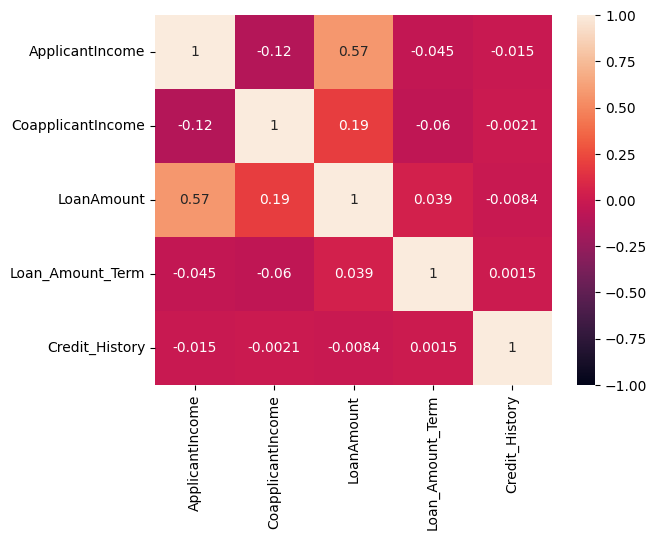

In [16]:
# Melakukan visualisasi pada data yang bersifat numeric (angka) dengan menggunakan heatmap
# agar dapat melihat hubungan antar satu sama lainnya
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True)

Dari heatmap di atas, dapat dilihat bahwa data Applicant Income dan Loan Amount memiliki relasi yang positif, kemudian disusul dengan data antara Loan Amount Term dengan Loan Amount

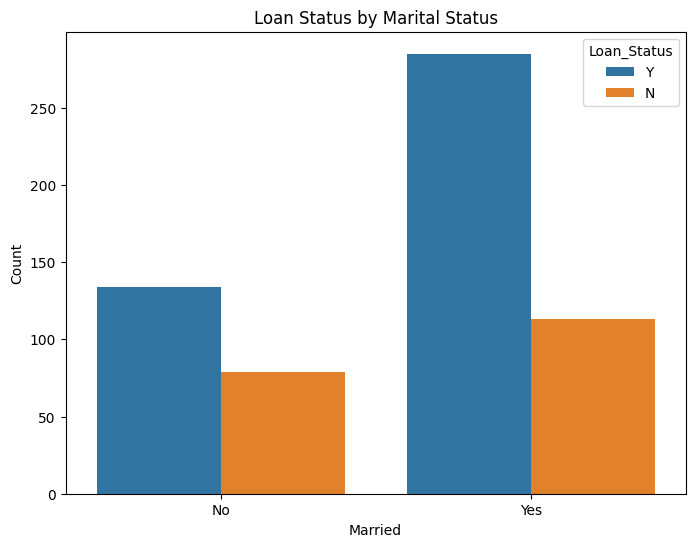

In [17]:
# Melakukan visualisasi untuk melihat hubungan antara status pernikahan dengan status pinjaman
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Married', hue='Loan_Status')
plt.title('Loan Status by Marital Status')
plt.xlabel('Married')
plt.ylabel('Count')
plt.show()

Berdasarkan pada visualisasi di atas, status pernikahan tampak memiliki pengaruh persetujuan pinjaman, di mana jumlah pemohon yang sudah menikah lebih banyak mendapatkan persetujuan pinjaman dibandingkan dengan yang ditolak. Sebaliknya, untuk pemohon yang belum menikah, jumlah yang mendapatkan persetujuan pinjaman juga lebih banyak dibandingkan yang ditolak, tetapi perbedaan ini tidak sebesar pada kelompok yang sudah menikah. 

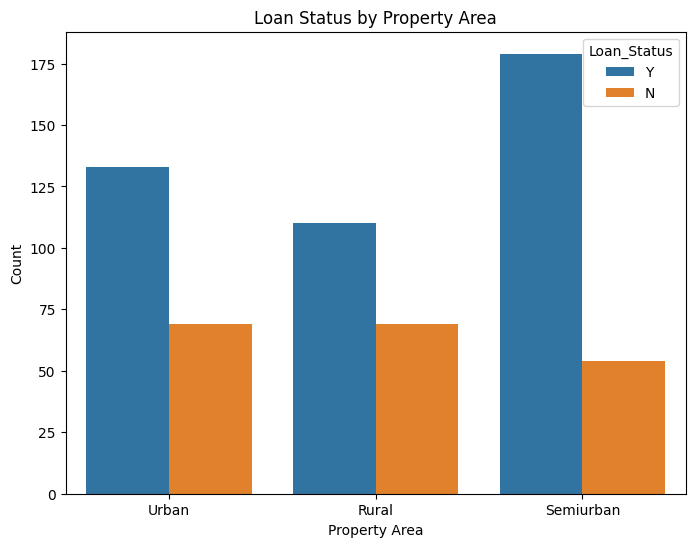

In [18]:
# Melakukan visualisasi untuk melihat hubungan antara loan status dengan property area
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Property_Area', hue='Loan_Status')
plt.title('Loan Status by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.show()

Berdasarkan visualisasi di atas, dapat dilihat bahwa pemohon yang tinggal di semi urban atau yang berada di kawasan wilayah transisi perdesaan ke perkotaan lebih banyak mendapatkan persetujuan pinjaman dibandingkan yang ditolak. Sementara yang pemohon yang berada di kawasan perdesaan walaupun jumlah yang mendapatkan persetujuan pinjaman lebih banyak dibanding yang ditolak, tetapi perbedaan tersebut tidak setinggi dengan pemohon yang tinggal di semi urban. Dalam kata lain, pemohon yang tinggal di perdesaan lebih besar kesempatan ditolak pinjamannya, berbanding terbalik dengan yang berada di kawasan semi urban

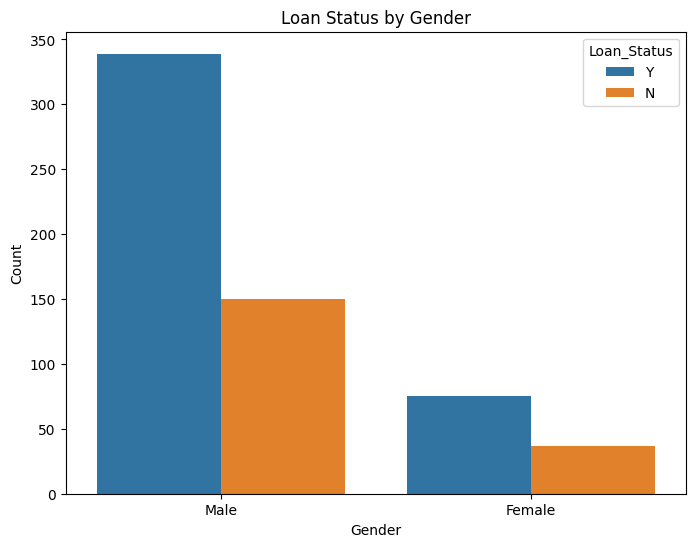

In [19]:
# Melakukan visualisasi hubungan antara gender dengan loan status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='Loan_Status')
plt.title('Loan Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Berdasarkan visualisasi awal, lebih banyak pemohon yang berjenis kelamin laki-laki dibanding wanita. Untuk status pinjaman juga pemohon yang berjenis kelamin laki-laki lebih banyak yang mendapatkan persetujuan pinjaman

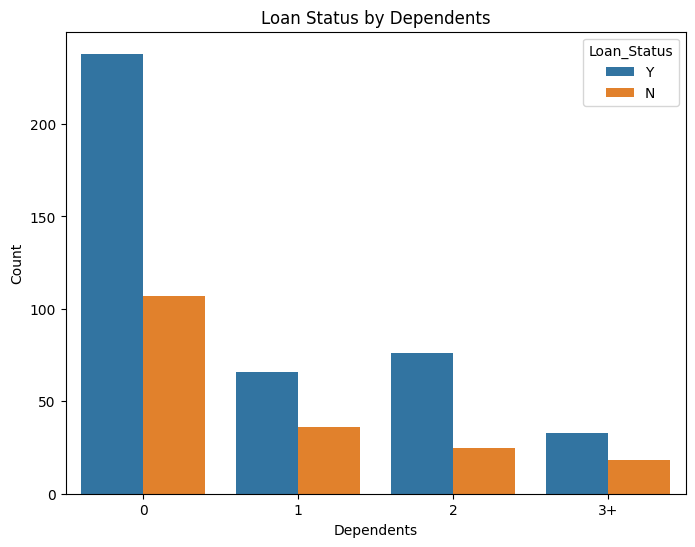

In [20]:
# Melakukan visualisasi perbdndingan antara dependents dengan loan status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Dependents', hue='Loan_Status')
plt.title('Loan Status by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.show()

Berdasarkan visualisasi perbandingan di atas, dapat dilihat bahwa pemohon yang tidak memiliki dependents atau tanggungan dan yang memiliki tanggungan sebanyak 2 orang memiliki kesempatan persetujuan pinjamannya dibandingkan dengan pemohon yang memiliki tanggungan hanya satu atau lebih dari 3

## Data Cleaning

Setelah dilakukan EDA untuk melihat pola dan informasi dari data, selanjutnya dilakukan data cleaning untuk mengatasi missing values

In [21]:
# Menghapus kolom Loan_ID
df.drop(columns=['Loan_ID'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [22]:
# Mengecek jumlah missing values pada setiap kolom
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
# Mengisi missing values pada kolom 'gender' dengan "Male" (karena muncul lebih sering berdasarkan EDA sebelumnya)
df['Gender'] = df['Gender'].fillna('Male')
df[df.isna().any(axis=1)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
...,...,...,...,...,...,...,...,...,...,...,...,...
583,Male,Yes,1,Graduate,No,1880,0.0,61.0,360.0,NaN,Rural,N
597,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


In [24]:
# Mengisi nilai yang NaN dengan mode (nilai yang pplaing sering muncul)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [25]:
# Menghitung mean dari Loan Amount
mean_loan_amount = df['LoanAmount'].mean()

# Mengisi missing value dengan mean
df['LoanAmount'].fillna(mean_loan_amount, inplace=True)

In [26]:
# Mengecek kembali missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


Dapat dilihat bahwa dari 614 entries, semua data telah 614 non-null, yang berarti sudah tidak ada missing values atau nilai yang kosong

In [27]:
# Menyimpan data yang sudah diatasi (no missing values)
df.to_csv("LoanClean.csv")

## Feature Engineering

Selanjutnya, setelah dilakukan EDA dan Data Cleaning, akan dilakukan feature engineering.

Data yang masih memiliki feature kategorikal akan diubah menjadi feature numerical dengan melakukan label encoding

In [28]:
# Membaca data yang telah dibersihkan sebelumnya
loan_clean = pd.read_csv('LoanClean.csv')
loan_clean.head()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [29]:
# Menghapus kolom yang tidak dibutuhkan
loan_clean.drop(columns=['Unnamed: 0'], inplace=True)

# Mengecek data
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [31]:
# One-Hot Encoding untuk kolom-kolom tertentu
one_hot_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
df_encoded = pd.get_dummies(loan_clean, columns=one_hot_cols)

In [32]:
df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,Y,False,True,True,False,...,False,False,False,True,False,True,False,False,False,True
1,4583,1508.0,128.000000,360.0,1.0,N,False,True,False,True,...,True,False,False,True,False,True,False,True,False,False
2,3000,0.0,66.000000,360.0,1.0,Y,False,True,False,True,...,False,False,False,True,False,False,True,False,False,True
3,2583,2358.0,120.000000,360.0,1.0,Y,False,True,False,True,...,False,False,False,False,True,True,False,False,False,True
4,6000,0.0,141.000000,360.0,1.0,Y,False,True,True,False,...,False,False,False,True,False,True,False,False,False,True


In [33]:
# Label Encoding untuk kolom target
label_encoder = LabelEncoder()
df_encoded['Loan_Status'] = label_encoder.fit_transform(loan_clean['Loan_Status'])

# Cek DataFrame yang telah diencode
df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,False,True,True,False,...,False,False,False,True,False,True,False,False,False,True
1,4583,1508.0,128.000000,360.0,1.0,0,False,True,False,True,...,True,False,False,True,False,True,False,True,False,False
2,3000,0.0,66.000000,360.0,1.0,1,False,True,False,True,...,False,False,False,True,False,False,True,False,False,True
3,2583,2358.0,120.000000,360.0,1.0,1,False,True,False,True,...,False,False,False,False,True,True,False,False,False,True
4,6000,0.0,141.000000,360.0,1.0,1,False,True,True,False,...,False,False,False,True,False,True,False,False,False,True


In [34]:
# Menghapus fitur yang tidak diperlukan
df_encoded = df_encoded.drop(['Gender_Female',
                            'Married_No',
                            'Education_Not Graduate',
                            'Self_Employed_No'], axis = 1)

# Rename nama kolom
RenameColumns = {'Gender_Male': 'Gender',
                   'Married_Yes': 'Married',
                   'Education_Graduate': 'Education',
                   'Self_Employed_Yes': 'Self_Employed'}

df_encoded.rename(columns=RenameColumns, inplace=True)

In [35]:
df_encoded = df_encoded.replace({True: 1, False: 0})
df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,1,0,1,0,0,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,1,0,1,0,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,1,1,0,0,0,1,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,1,1,0,0,0,0,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,1,0,1,0,0,0,1,0,0,0,1


In [36]:
# Menyimpan data yang telah di encoding
df_encoded.to_csv("LoanData_Encoded.csv")

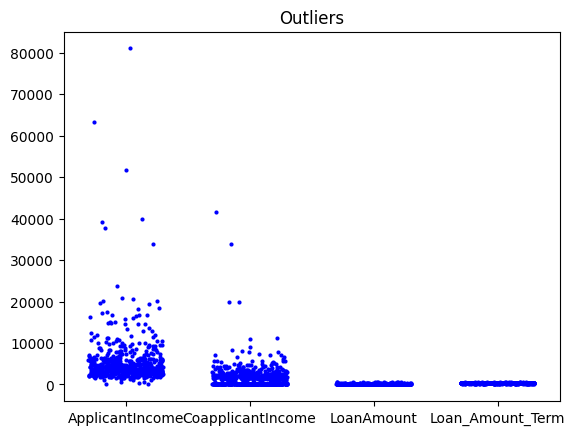

In [39]:
# Mengecek outlier
cek_outlier = df_encoded.get(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"])

sns.stripplot(data=cek_outlier, color="blue", jitter=0.3, size=3)

plt.title("Outliers")

plt.show()

In [42]:
# IQR Scaling untuk mengatasi outlier
Q1 = df_encoded.astype(np.float32).quantile(0.25)
Q3 = df_encoded.astype(np.float32).quantile(0.75)

# Menghitung rentang IQR
IQR = Q3 - Q1

# Menghapus outliers
df_encoded = df_encoded[~((df_encoded < (Q1 - 1.5 * IQR)) |(df_encoded > (Q3 + 1.5 * IQR))).any(axis=1)]

# Mengecek ukuran data
print(df_encoded.shape)

(136, 17)


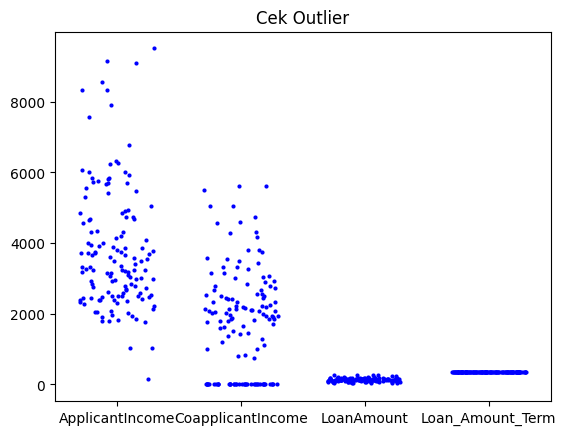

In [43]:
# Mengecek kolom yang terdapat outlier kembali
cek_outlier = df_encoded.get(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"])

sns.stripplot(data=cek_outlier, color="blue", jitter=0.3, size=3)

plt.title("Cek Outlier")

plt.show()

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

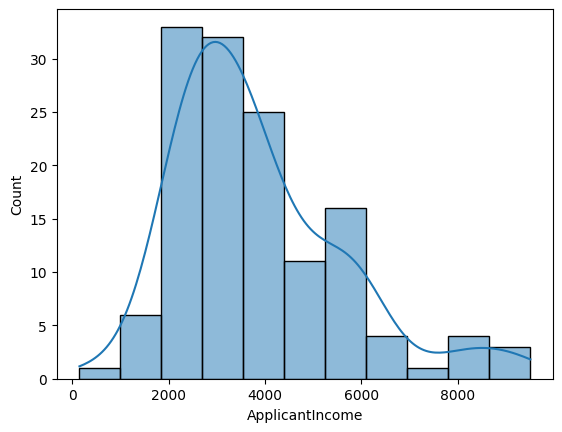

In [44]:
sns.histplot(data=df_encoded, x="ApplicantIncome", kde=True)

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

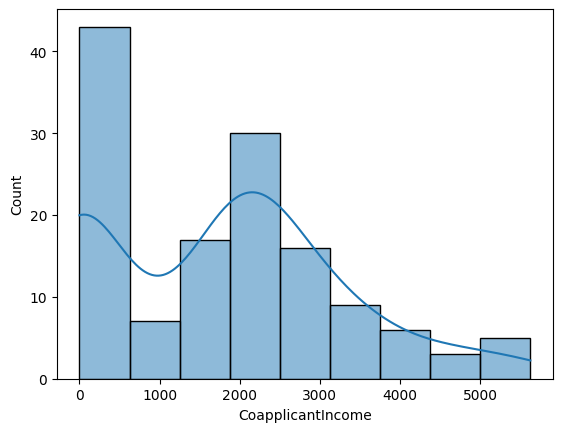

In [45]:
sns.histplot(data=df_encoded, x="CoapplicantIncome", kde=True)

<Axes: xlabel='LoanAmount', ylabel='Count'>

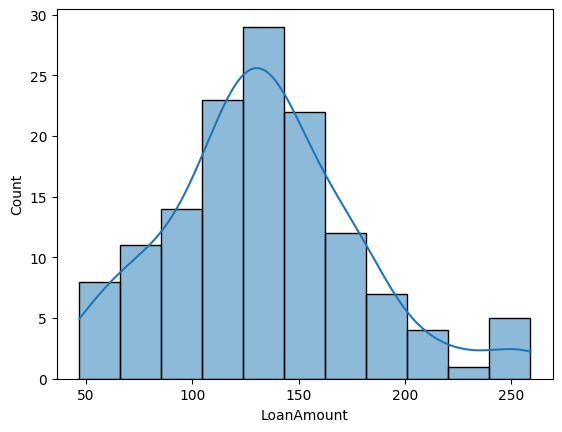

In [46]:
sns.histplot(data=df_encoded, x="LoanAmount", kde=True)

In [47]:
df_encoded.to_csv("LoanData2.csv")

## Praproses Data

Setelah menghandle outliers, dilakukan tahap praproses untuk menyiapkan data sebelum dilakukan pelatihan oleh model machine learning.
Pada tahap ini, dilakukan:
- Membagi data menjadi features dan target
- Melakukan teknik SMOTE
- Membagi data latih dan data uji

In [48]:
loandata = pd.read_csv('LoanData2.csv')
loandata.head()

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,146.412162,360.0,1.0,1,1,0,1,0,0,0,1,0,0,0,1
1,4,6000,0.0,141.000000,360.0,1.0,1,1,0,1,0,0,0,1,0,0,0,1
2,13,1853,2840.0,114.000000,360.0,1.0,0,1,0,1,0,0,0,1,0,1,0,0
3,15,4950,0.0,125.000000,360.0,1.0,1,1,0,1,0,0,0,1,0,0,0,1
4,19,2600,3500.0,115.000000,360.0,1.0,1,1,1,1,0,0,0,1,0,0,0,1


In [49]:
# Menghitung jumlah nilai pada kolom Loan_Status
loan_status_counts = loandata['Loan_Status'].value_counts()

print("Jumlah nilai pada kolom Loan_Status:")
print(loan_status_counts)

Jumlah nilai pada kolom Loan_Status:
Loan_Status
1    112
0     24
Name: count, dtype: int64


Berdasarkan jumlah data status pinjaman, data status yang mendapatkan persetujuan pinjaman (1) jumlahnya jauh lebih banyak, yaitu 112 data. Sementara untuk jumlah data yang statusnya ditolak (0) hanya 24. Hal ini menunjukkan adanya ketidakseimbangan kelas. Maka perlu dilakukan teknik SMOTE, agar kelas menjadi lebih seimbang dan meningkatkan kinerja model machine learning, serta mengurangi terjadinya overfitting.

In [50]:
loandata.drop(columns=['Unnamed: 0'], inplace=True)

loandata.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,1,0,1,0,0,0,1,0,0,0,1
1,6000,0.0,141.000000,360.0,1.0,1,1,0,1,0,0,0,1,0,0,0,1
2,1853,2840.0,114.000000,360.0,1.0,0,1,0,1,0,0,0,1,0,1,0,0
3,4950,0.0,125.000000,360.0,1.0,1,1,0,1,0,0,0,1,0,0,0,1
4,2600,3500.0,115.000000,360.0,1.0,1,1,1,1,0,0,0,1,0,0,0,1


In [52]:
# Menyiapkan fitur (X) dan target (y)
X = loandata.drop(columns=['Loan_Status'])
y = loandata['Loan_Status']

print("Shape of X:", X.shape)
print("Shape of Y:", y.shape)

Shape of X: (136, 16)
Shape of Y: (136,)


In [53]:
X, y = SMOTE().fit_resample(X, y)

<ipython-input-57-8c7492e04d09>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y, data=loandata, palette="coolwarm")


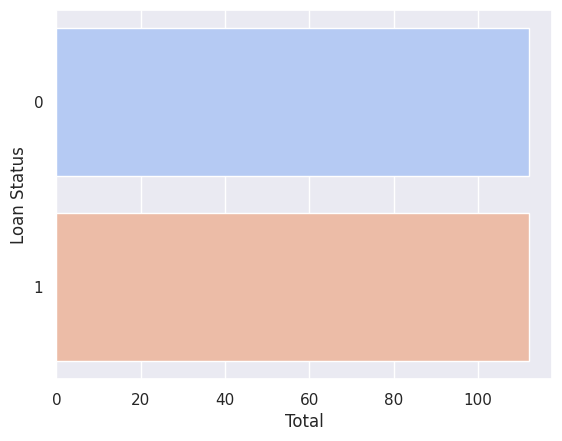

In [57]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=loandata, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

In [58]:
loandata.to_csv("LoanData_SMOTE.csv")

In [61]:
# Melakukan scaling pada data
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [64]:
# Inisialisasi model dengan class weights
models = {
    "Logistic Regression": LogisticRegression(solver='saga', random_state=1),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Fungsi untuk evaluasi model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    return accuracy, conf_matrix, class_report

# Evaluasi setiap model
results = {}
for model_name, model in models.items():
    accuracy, conf_matrix, class_report = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[model_name] = {
        "Accuracy": accuracy,
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report
    }

# Cetak hasilnya
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("Classification Report:")
    print(metrics['Classification Report'])
    print("\n" + "="*60 + "\n")

Model: Logistic Regression
Accuracy: 0.7777777777777778
Confusion Matrix:
[[17  6]
 [ 4 18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.74      0.77        23
           1       0.75      0.82      0.78        22

    accuracy                           0.78        45
   macro avg       0.78      0.78      0.78        45
weighted avg       0.78      0.78      0.78        45



Model: Decision Tree
Accuracy: 0.6666666666666666
Confusion Matrix:
[[18  5]
 [10 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.78      0.71        23
           1       0.71      0.55      0.62        22

    accuracy                           0.67        45
   macro avg       0.67      0.66      0.66        45
weighted avg       0.67      0.67      0.66        45



Model: Random Forest
Accuracy: 0.8222222222222222
Confusion Matrix:
[[21  2]
 [ 6 16]]
Classification Report:
      

Model machine learning yang mendapatkan akurasi tertinggi untuk prediksi loan eligible yaitu dengan menggunakan model Random Forest dan SVM dengan akurasi sebesar 82.22%. Sementara akurasi terendah dengan menggunakan Decision Tree yaitu sebesar 66.66%.